# VES1dforward
1D forward modelling of Schlumberger Sounding Data <br>
Based on the VES1dmod foward model by Yunus Levent Ekinci and Alper Demirci 

**Written by**:
<br>
Matlab: Matthias Bucker, November 2018 <br>
Hannah Boinowitz, June/July 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Calculate measured resistivities 

In [2]:
def VES1d_modell(r,t,s):
    q = 13
    f = 10
    m = 4.438
    x = 0
    e = np.exp(0.5 * np.log(10) / m)
    h = 2 * q - 2
    u = s * np.exp(- f * np.log(10) / m - x)
    l = len(r) - 1
    n = 1
    a = np.zeros(n + h);
    for i in range(n + h):
        w = l
        v = r[l]
        while w > 1:
            w = w - 1
            aa = np.tanh(t[w] / u)
            v = (v + r[w] * aa) / (1 + v * aa / r[w])
        a[i] = v
        u *= e
    i = 0;
    g = 105 * a[i] - 262 * a[i+2] + 416 * a[i+4] - 746 * a[i+6] + 1605 * a[i+8]
    g -= 4390 * a[i+10] + 13396 * a[i+12] - 27841 * a[i + 14]
    g += 16448 * a[i+16] + 8183 * a[i+18] + 2525 * a[i+20]
    g = (g + 336 * a[i+22] + 225 * a[i+24])/10000
    
    return g

## Setup

In [3]:
# Define AB/2 array (m)
ab2_min = 1         # Smallest spacing
ab2_max = 100      # Largest spacing
ab2_N = 20          # Total number of spacings
ab2 = np.logspace(np.log(ab2_min),np.log(ab2_max),ab2_N)
roa = np.zeros(ab2_N)
export = True # Indicating if .csv-export is wished

# Layered model
r = [200, 20, 30, 80]    # Layer resistivities
t = [5, 15, 30]      	# Layer thicknesses (m)
# Note that length of r must be length of t + 1!

# Compute apparent resistivity
# Loop over AB/2 spacings
for i in range(ab2_N):
    roa[i] = VES1d_modell(r,t,ab2[i])
    # Add noise
    X = 0 
    roa[i] += np.random.normal(0, X/100 * roa[i])


## Plotting

### Resistivity model

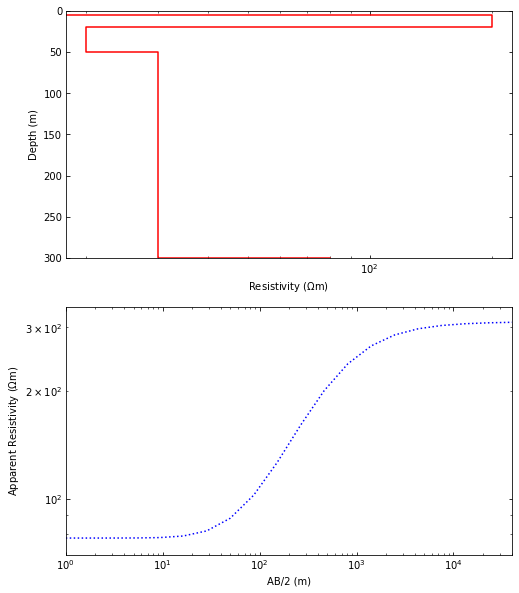

In [4]:
# Prepare for plotting
fig, axs = plt.subplots(2, 1, figsize=(8,10))

rr = [0, *r];
tt = [0, *np.cumsum(t), max(t) * 10];

axs[0].step(rr,tt,'r-')
axs[0].set_xscale('log')
axs[0].set_ylim(max(tt), 0)
axs[0].yaxis.set_tick_params(which='both', right=True, direction='in')
axs[0].xaxis.set_tick_params(which='both', top=True, direction='in')
axs[0].set_xlabel('Resistivity ($\Omega$m)')
axs[0].set_ylabel('Depth (m)')

axs[1].plot(ab2, roa, linestyle=':',color='b')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlim([min(ab2),max(ab2)]);
axs[1].set_ylim([0.9 * min(roa), 1.1 * max(roa)])
axs[1].yaxis.set_tick_params(which='both', right=True, direction='in')
axs[1].xaxis.set_tick_params(which='both', top=True, direction='in')
axs[1].set_xlabel('AB/2 (m)')
axs[1].set_ylabel('Apparent Resistivity ($\Omega$m)')

plt.savefig('ice_content_plots/example.png', dpi=1000)
plt.show()

In [5]:
if export:
    df = pd.DataFrame()
    df['AB/2 (m)'] = ab2
    df['Apparent Resistivity (Omega m)'] = roa
    df.to_csv('sounding_data.csv')
    print(df)

        AB/2 (m)  Apparent Resistivity (Omega m)
0       1.000000                       77.780004
1       1.747340                       77.780421
2       3.053197                       77.786471
3       5.334972                       77.823665
4       9.322009                       78.011699
5      16.288717                       78.804945
6      28.461925                       81.431826
7      49.732655                       88.306740
8      86.899850                      102.369131
9     151.843569                      126.271868
10    265.322318                      160.441398
11    463.608255                      200.011932
12    810.081172                      237.247816
13   1415.487103                      266.335211
14   2473.337003                      285.716327
15   4321.760274                      297.188258
16   7551.583891                      303.522368
17  13195.183361                      306.931679
18  23056.469535                      308.773808
19  40287.487706    